## AB Test using Machine Learning

In [273]:
#importing important packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import scipy.stats as st

### Data Loading

In [315]:
#importing ad csv data using pandas
ad_data = pd.read_csv("ABAdRecall.csv")

In [316]:
#showing five top rows
ad_data.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


### Data Quality Check

In [317]:
# Describing and showing info of dataset
print(ad_data.describe())
print(ad_data.info())

              hour  platform_os          yes           no
count  8077.000000  8077.000000  8077.000000  8077.000000
mean     11.615080     5.947134     0.070818     0.083075
std       5.734879     0.224333     0.256537     0.276013
min       0.000000     5.000000     0.000000     0.000000
25%       7.000000     6.000000     0.000000     0.000000
50%      13.000000     6.000000     0.000000     0.000000
75%      15.000000     6.000000     0.000000     0.000000
max      23.000000     7.000000     1.000000     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
auction_id     8077 non-null object
experiment     8077 non-null object
date           8077 non-null object
hour           8077 non-null int64
device_make    8077 non-null object
platform_os    8077 non-null int64
browser        8077 non-null object
yes            8077 non-null int64
no             8077 non-null int64
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [318]:
### Checking if dataset have null values
ad_data.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [319]:
# Checking if all id is unique
print(ad_data['auction_id'].count())
print(ad_data['auction_id'].nunique())

8077
8077


As we can see from the above there is no null value and all the id's are unique

### Data Wrangling

In [320]:
#Remove device make and browser 
# Remove Date and Payments columns
del ad_data['device_make'], ad_data['browser'],ad_data['platform_os'],ad_data['hour']

In [321]:
ad_data.head()

,auction_id,experiment,date,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,0,0


In [322]:
#Converting date from catagorical to numerical
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
ad_data["date"] = lb_make.fit_transform(ad_data["date"])
ad_data["experiment"] = lb_make.fit_transform(ad_data["experiment"])
ad_data.head()

,auction_id,experiment,date,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,1,7,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,1,4,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,1,2,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,0,0,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,0,0,0,0


In [323]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ad_data.loc[:, ad_data.columns != 'yes'],ad_data['yes'], test_size=0.1,random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

## Helper Functions

* Function for printing the evaluation scores related to a regression problem
* Function for plotting the original values and values predicted by the model

In [283]:
# Confusion matrix plot
def confusion_matrix_plot(y_test, y_preds):
    cm = confusion_matrix(y_test, y_preds)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [284]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def calculate_metrics(y_test, y_preds):
    rmse = np.sqrt(mean_squared_error(y_test, y_preds))
    r_sq = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    print('RMSE Score: {}'.format(rmse))
    print('R2_Squared: {}'.format(r_sq))
    print('MAE Score: {}'.format(mae))

In [285]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    print(len(y_test),len(y_preds))
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='blue')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='red')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('# Oberservation')
    plt.ylabel('Yes')
    title = 'True labels vs. Predicted Labels ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

### Model 1 Logistic regression

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import KFold

# Fitting Logistic regression model
X_train_refined = X_train.drop(columns=['auction_id'], axis=1)
model = LogisticRegression()
model.fit(X_train_refined, y_train)


C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [288]:
#predicting
X_test_refined = X_test.drop(columns=['auction_id'], axis=1)
y_preds = model.predict(X_test_refined)

### Calculating Loss For Logistic Regression Using Log Loss

In [289]:
#validating
X_val_refined = X_val.drop(columns=['auction_id'], axis=1)
yval_preds = model.predict(X_val_refined)
# Loss function
from sklearn.metrics import log_loss
log_loss(y_val,yval_preds)

2.1843955740136005

In [290]:
print(model.score(X_train_refined, y_train))
print(model.score(X_test_refined, y_test))

0.9287795403043057
0.9220297029702971


In [291]:
confusion_matrix(y_test, y_preds)

array([[745,   0],
       [ 63,   0]], dtype=int64)

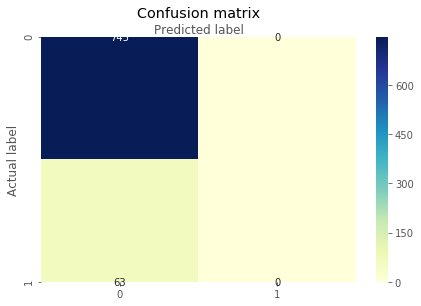

In [292]:
#Plotting Prediction and Test of linear regression model
%matplotlib inline
confusion_matrix_plot(y_test, y_preds)

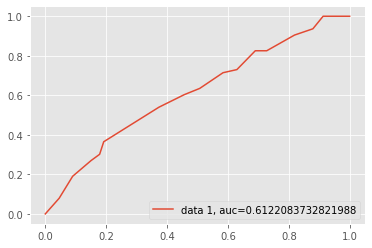

In [293]:
###ROC Curve
y_pred_proba = model.predict_proba(X_test_refined)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [294]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       745
           1       0.00      0.00      0.00        63

   micro avg       0.92      0.92      0.92       808
   macro avg       0.46      0.50      0.48       808
weighted avg       0.85      0.92      0.88       808



C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner pc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


808 808


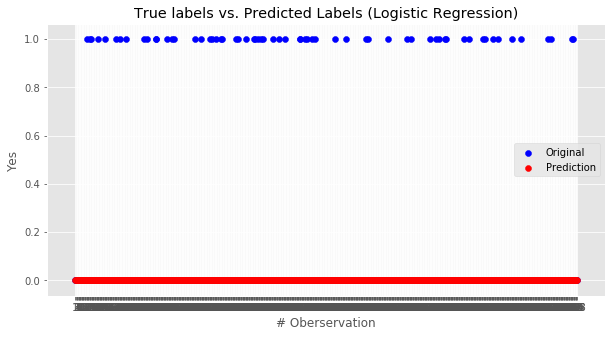

In [295]:
plot_preds(y_test, y_preds, "Logistic Regression")

### KFold Cross validation Approach

In [303]:
# KFold Cross Validation approach
kf = KFold(n_splits=5,shuffle=False)
X = ad_data.loc[:, ad_data.columns != 'yes']
X = X.drop(columns=['auction_id'], axis=1)
y = ad_data['yes']
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(metrics.accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# Print the accuracy    
print(accuracy_model)
print((sum(accuracy_model)/len(accuracy_model)))


[93.56435643564357, 93.93564356435643, 93.06501547987615, 91.70278637770897, 92.3219814241486]
92.91795665634675


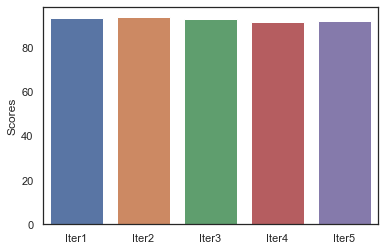

In [304]:
### Visualize accuracy for each iteration
 
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

In [252]:
# Accuracy percentage of k fold cross validation approach
from sklearn import model_selection
X = ad_data.loc[:, ad_data.columns != 'yes']
X = X.drop(columns=['auction_id'], axis=1)
y = ad_data['yes']
kfold = model_selection.KFold(n_splits=5, random_state=100)
model_kfold = LogisticRegression(solver='liblinear')
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 92.92%


### Model 02: Decision Tree

In [330]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [331]:
dtree = DecisionTreeRegressor(max_depth=5, min_samples_leaf =4, random_state=7)
dtree.fit(X_train_refined, y_train)
y_preds = dtree.predict(X_test_refined)



### Decision Tree Loss Function

In [335]:
X_val_refined = X_val.drop(columns=['auction_id'], axis=1)
y_preds_val =  dtree.predict(X_val_refined)
calculate_metrics(y_val, y_preds_val)

RMSE Score: 0.24348226667508563
R2_Squared: -0.0006545786326708214
MAE Score: 0.12370657361801637


### Decision Tree Scatter Plot for test and prediction

1616 1616


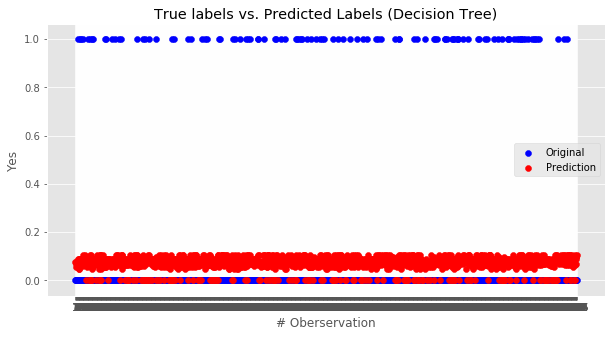

In [209]:
plot_preds(y_test, y_preds, 'Decision Tree')

### K Fold Cross validation Approach

In [307]:
# KFold Cross Validation approach
X = ad_data.loc[:, ad_data.columns != 'yes']
X = X.drop(columns=['auction_id'], axis=1)
y = ad_data['yes']
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Initialize the accuracy of the models to blank list. The accuracy of each model will be appended to this list
accuracy_model = []
 
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    clf = DecisionTreeClassifier(random_state=20)
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(metrics.accuracy_score(y_test, model.predict(X_test), normalize=True)*100)

# Print the accuracy    
print(accuracy_model)

[93.56435643564357, 93.93564356435643, 93.06501547987615, 91.70278637770897, 92.3219814241486]


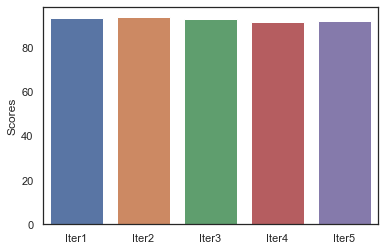

In [308]:
### Visualize accuracy for each iteration
 
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

### Accuracy Per decision tree depth 

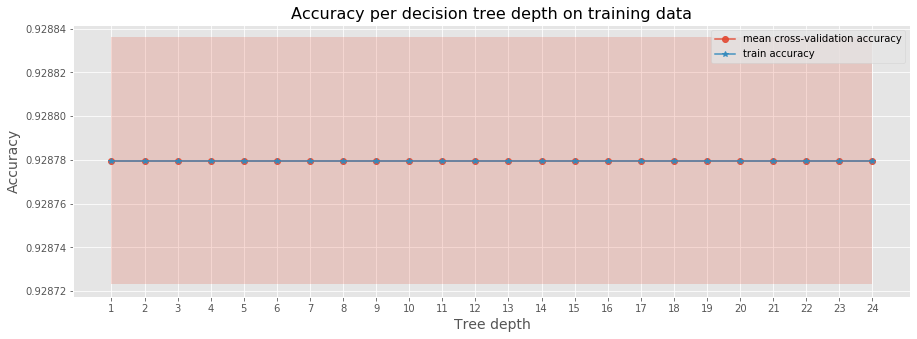

In [300]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = model_selection.cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train_refined, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [301]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-1 tree achieves the best mean cross-validation accuracy 92.87795 +/- 0.00282% on training dataset


In [302]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train_refined, y_train, 
                                                                          X_test_refined, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  1
Accuracy, Training Set:  92.87795 %
Accuracy, Test Set:  92.20297 %


## Model 3 XGBoost

In [310]:
import xgboost as xgb

In [324]:
DM_train = xgb.DMatrix(data=X_train_refined,label=y_train)
DM_test = xgb.DMatrix(data=X_test_refined,label=y_test)

In [325]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [326]:
parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
}

In [327]:
xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
y_preds = xg_reg.predict(DM_test)

[16:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [328]:
calculate_metrics(y_test, y_preds)

RMSE Score: 0.28738576590471177
R2_Squared: -0.14883169075700442
MAE Score: 0.18665964473592173


808 808


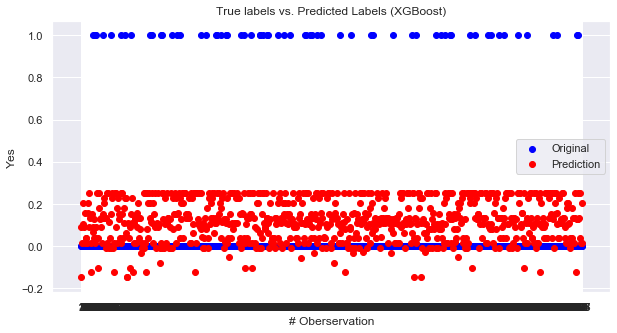

In [329]:
plot_preds(y_test, y_preds, 'XGBoost')

### XGBoost Using K Fold Cross Validation 

[06:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[-0.00776783  0.06349146 -0.02974494 ...  0.15850386  0.25329727
  0.20579107]


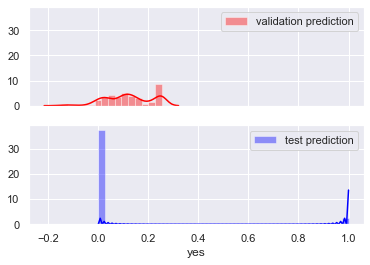

[06:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0.11167137 0.18266644 0.04051639 ... 0.2538214  0.11151147 0.2538214 ]


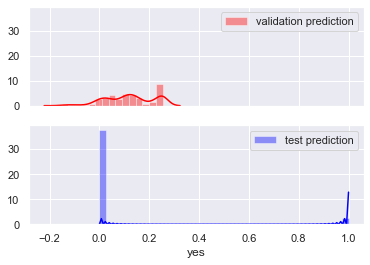

[06:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0.06112427 0.25191402 0.2278033  ... 0.25191402 0.11216201 0.01290283]


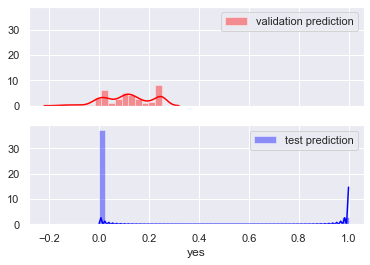

[06:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:41] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[-0.03261744  0.12747012  0.07921976 ...  0.03096938  0.25037026
  0.25037026]


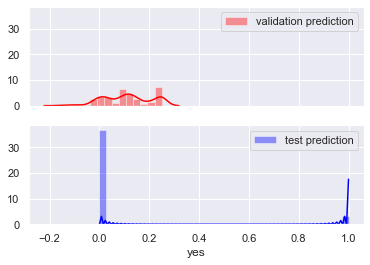

[06:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[06:33:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { gamma, max_depth, n_estimators, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:33:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0.11009404 0.25091007 0.15283544 ... 0.22744073 0.10589677 0.08662471]


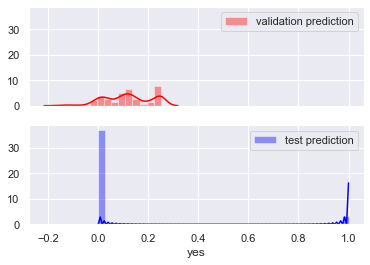

[]


In [343]:
#K fold cross validation approach
X = ad_data.loc[:, ad_data.columns != 'yes']
X = X.drop(columns=['auction_id'], axis=1)
y = ad_data['yes']
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)    
     
# Iterate over each train-test split
for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    DM_train = xgb.DMatrix(data=X_train,label=y_train)
    DM_test = xgb.DMatrix(data=X_test,label=y_test)
    parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1. 
    }
    parameters = {
    'max_depth': 6,
    'objective': 'reg:linear',
    'booster': 'gblinear',
    'n_estimators': 1000,
    'learning_rate': 0.2,
    'gamma': 0.01,
    'random_state': 7,
    'subsample': 1.
    }
    xg_reg = xgb.train(params = parameters, dtrain=DM_train, num_boost_round=8)
    y_pred = xg_reg.predict(DM_test)
    print(y_pred)
    # Append to accuracy_model the accuracy of the model
    #accuracy_model.append(metrics.accuracy_score(y_test, xg_reg.predict(DM_test), normalize=True)*100)
    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
    sns.distplot(y_pred, ax=ax[0], color='red', label='validation prediction')
    sns.distplot(y_test, ax=ax[1], color='blue', label='test prediction')
    ax[0].legend(loc=0)
    ax[1].legend(loc=0)
    plt.show()

